## Table of Content:

1. Importing the libraries and dataset
2. Data Preprocessing and Feature Engineering
3. Building the RNN
4. Making the predictions and visualising the results



## 1. Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import json
import pickle
import joblib

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential

# import pad sequence
from keras_preprocessing.sequence import pad_sequences

from keras.layers import Dense, LSTM, Dropout
from keras.preprocessing.text import Tokenizer

from keras.layers import Embedding



from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
data=pd.read_csv("Resources/prepared_data1.csv")
data.fillna('',inplace=True)
data.head()


,Body,Label
0,save life insurance spend life quote saving en...,1
1,fight risk cancer http www adclick w p cfm pk ...,1
2,fight risk cancer http www adclick w p cfm pk ...,1
3,adult club offer free membership instant acces...,1
4,thought might like slim guaranteed lose lb day...,1


## 2. Data Preprocessing and Feature Engineering

In [15]:
texts=list(data['Body'])
labels=list(data['Label'].astype(bool))


print(len(texts),len(labels))

5293 5293


In [16]:
print("No. of 0 labels:",labels.count(0))
print("No. of 1 labels:",labels.count(1))

No. of 0 labels: 3915
No. of 1 labels: 1378


In [17]:
# Maximal length of the text
maxlen=100

# Maximal number of words to be used
max_words=10000

# instantiate tokenizer
tokenizer = Tokenizer()

# fit tokenizer on text
tokenizer.fit_on_texts(texts)

# create sequences
sequences = tokenizer.texts_to_sequences(texts)

# create word index
word_index = tokenizer.word_index

# create reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


print('Found %s unique tokens.' % len(word_index))


Found 61499 unique tokens.


In [18]:

# pad sequences
padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')


# split data into training and testing
split = int(0.8 * len(texts))


# shuffle data
indices = np.arange(padded.shape[0])
np.random.shuffle(indices)
padded = padded[indices]

labels = np.asarray(labels)
labels = labels[indices]

# split data into training and testing

train_sequences = padded[:split]
test_sequences = padded[split:]

train_labels = np.asarray(labels[:split])
test_labels = np.asarray(labels[split:])



print('Shape of training data tensor:', train_sequences.shape)
print('Shape of training label tensor:', train_labels.shape)
print('Shape of testing data tensor:', test_sequences.shape)
print('Shape of testing label tensor:', test_labels.shape)



Shape of training data tensor: (4234, 100)
Shape of training label tensor: (4234,)
Shape of testing data tensor: (1059, 100)
Shape of testing label tensor: (1059,)


## 3. Building the RNN

In [19]:

# parameters

vocab_size = len(word_index) + 1
embedding_dim = 32

# create model

# instantiate model
model = Sequential()


# add embedding layer
model.add(Embedding(vocab_size, embedding_dim))

# add LSTM layer
model.add(LSTM(32))

# add dense layer
model.add(Dense(1, activation='sigmoid'))

# model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          1968000   
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,976,353
Trainable params: 1,976,353
Non-trainable params: 0
_________________________________________________________________


In [20]:

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [21]:
# fit model

history = model.fit(train_sequences, train_labels,
        epochs=10, 
        validation_data=(test_sequences, test_labels), 
        verbose=2,
        batch_size=32
        
        )

Epoch 1/10
133/133 - 9s - loss: 0.4133 - accuracy: 0.8380 - val_loss: 0.2324 - val_accuracy: 0.9386 - 9s/epoch - 66ms/step
Epoch 2/10
133/133 - 7s - loss: 0.1704 - accuracy: 0.9587 - val_loss: 0.2282 - val_accuracy: 0.9396 - 7s/epoch - 51ms/step
Epoch 3/10
133/133 - 6s - loss: 0.1373 - accuracy: 0.9681 - val_loss: 0.1788 - val_accuracy: 0.9537 - 6s/epoch - 48ms/step
Epoch 4/10
133/133 - 7s - loss: 0.0963 - accuracy: 0.9795 - val_loss: 0.2321 - val_accuracy: 0.9433 - 7s/epoch - 50ms/step
Epoch 5/10
133/133 - 7s - loss: 0.0992 - accuracy: 0.9752 - val_loss: 0.1135 - val_accuracy: 0.9717 - 7s/epoch - 56ms/step
Epoch 6/10
133/133 - 7s - loss: 0.1600 - accuracy: 0.9627 - val_loss: 0.2772 - val_accuracy: 0.9254 - 7s/epoch - 50ms/step
Epoch 7/10
133/133 - 6s - loss: 0.4061 - accuracy: 0.8642 - val_loss: 0.1908 - val_accuracy: 0.9613 - 6s/epoch - 45ms/step
Epoch 8/10
133/133 - 6s - loss: 0.0847 - accuracy: 0.9877 - val_loss: 0.1116 - val_accuracy: 0.9717 - 6s/epoch - 44ms/step
Epoch 9/10
133/1

## 4. Making the predictions and visualising the results

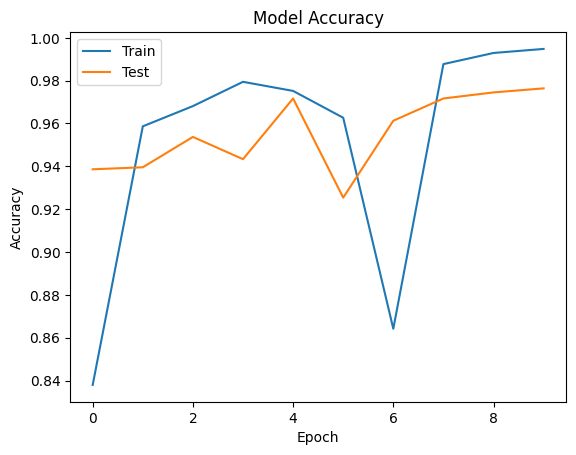

In [23]:


# plot training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()





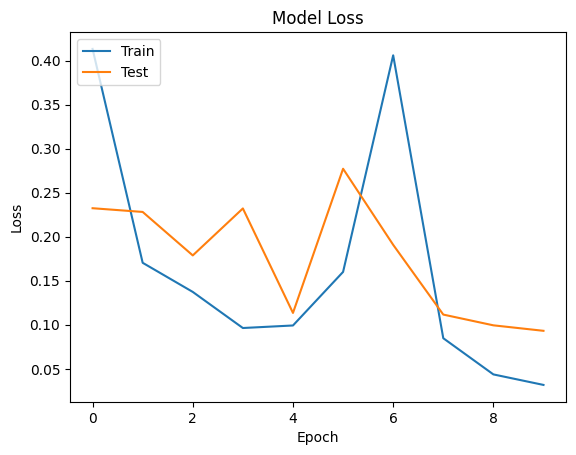

In [24]:
# plot training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



In [25]:

# evaluate model
loss, accuracy = model.evaluate(test_sequences, test_labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

# make predictions
predictions = model.predict(test_sequences)

# print predictions
print(predictions[:10])

# print actual values
print(test_labels[:10])



Accuracy: 97.639281
34/34 [==============================] - 1s 10ms/step
[[0.982741  ]
 [0.01425094]
 [0.01616781]
 [0.00660698]
 [0.9781507 ]
 [0.02921117]
 [0.0066239 ]
 [0.00944135]
 [0.9830121 ]
 [0.98290694]]
[ True False False False  True False  True False  True  True]


In [26]:

# print confusion matrix
cm = confusion_matrix(test_labels, predictions.round())
print(cm)


[[772  14]
 [ 11 262]]


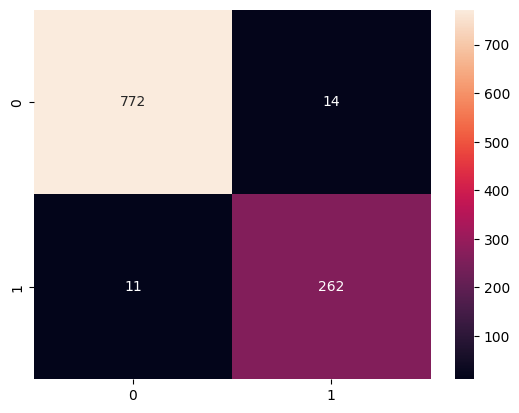

In [27]:
# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [28]:
# print classification report
print(classification_report(test_labels, predictions.round()))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       786
        True       0.95      0.96      0.95       273

    accuracy                           0.98      1059
   macro avg       0.97      0.97      0.97      1059
weighted avg       0.98      0.98      0.98      1059



In [ ]:
# Saving the model

model.save("Resources/RNN_model.h5")

# Saving the tokenizer

with open('Resources/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the word index

with open('Resources/word_index.json', 'w') as fp:
    json.dump(word_index, fp)

# Saving the reverse word index

with open('Resources/reverse_word_index.json', 'w') as fp:
    json.dump(reverse_word_index, fp)
